## Read datasets

In [198]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
random_state = 42
import warnings
warnings.filterwarnings('ignore')

artificial

In [2]:
def read_artificial_data(dir_path="."):
    art_train_data = pd.read_csv(dir_path+'/artificial_train.data', sep=' ', header=None)
    art_train_data = art_train_data.drop(art_train_data.columns[500], axis=1)
    art_train_labels = pd.read_csv(dir_path+'/artificial_train.labels', sep=' ', header=None)
    art_train_labels[0] = art_train_labels[0].apply(lambda x: 0 if x == -1 else 1)
    art_train_X, art_val_X, art_train_y, art_val_y = train_test_split(art_train_data, art_train_labels, test_size=0.2, random_state=random_state)
    art_test_data = pd.read_csv(dir_path+'/artificial_valid.data', sep=' ', header=None)
    art_test_data = art_test_data.drop(art_test_data.columns[500], axis=1)
    minmax=MinMaxScaler()
    art_train_X=pd.DataFrame(minmax.fit_transform(art_train_X))
    art_val_X=pd.DataFrame(minmax.transform(art_val_X))
    art_test_data=pd.DataFrame(minmax.transform(art_test_data))
    return art_train_X, art_train_y, art_val_X, art_val_y, art_test_data

In [97]:
art_train_X, art_train_y, art_val_X, art_val_y, art_test_data = read_artificial_data()
art_train_X.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.780488,0.433790,0.320423,0.138462,0.451505,0.456522,0.454902,0.6,0.745283,0.583333,...,0.620155,0.275862,0.805714,0.169666,0.477733,0.454148,0.744186,0.52,0.522222,0.322222
1,0.658537,0.337900,0.383803,0.723077,0.571906,0.304348,0.733333,0.4,0.490566,0.479167,...,0.573643,0.448276,0.440000,0.613111,0.611336,0.406114,0.279070,0.70,0.640741,0.511111
2,0.463415,0.392694,0.799296,0.384615,0.327759,0.521739,0.470588,0.4,0.632075,0.729167,...,0.767442,0.344828,0.640000,0.520566,0.441296,0.462882,0.488372,0.69,0.462963,0.483333
3,0.439024,0.360731,0.661972,0.353846,0.615385,0.239130,0.709804,0.6,0.566038,0.520833,...,0.542636,0.482759,0.445714,0.290488,0.510121,0.576419,0.465116,0.53,0.551852,0.450000
4,0.365854,0.488584,0.429577,0.646154,0.304348,0.434783,0.392157,0.5,0.188679,0.375000,...,0.767442,0.448276,0.565714,0.737789,0.914980,0.441048,0.674419,0.51,0.403704,0.488889


spam
with use of [repo](https://github.com/edumunozsala/Intro-NLP-Text-Classification/blob/master/Intro_NLP_1_TFIDF_Text_Classification.ipynb)

In [3]:
def read_spam(dir_path='.'):
    spam_train = pd.read_csv(dir_path+'/sms_train.csv', sep=',')
    spam_test_data = pd.read_csv(dir_path+'/sms_test.csv', sep=',')
    spam_train_data, spam_train_labels = spam_train['message'], spam_train['label']
    
    spam_train_X, spam_val_X, spam_train_y, spam_val_y = train_test_split(spam_train_data, spam_train_labels, test_size=0.2, random_state=random_state)

    tfidf = TfidfVectorizer()
    train = tfidf.fit_transform(spam_train_X)
    spam_train_X = pd.DataFrame(train.toarray())

    val = tfidf.transform(spam_val_X)
    spam_val_X = pd.DataFrame(val.toarray())

    test = tfidf.transform(spam_test_data['message'])
    spam_test_data = pd.DataFrame(test.toarray())

    minmax=MinMaxScaler()
    spam_train_X=pd.DataFrame(minmax.fit_transform(spam_train_X), columns=tfidf.get_feature_names())
    spam_val_X=pd.DataFrame(minmax.transform(spam_val_X), columns=tfidf.get_feature_names())
    spam_test_data=pd.DataFrame(minmax.transform(spam_test_data), columns=tfidf.get_feature_names())
    return spam_train_X, spam_train_y, spam_val_X, spam_val_y, spam_test_data

In [51]:
spam_train_X, spam_train_y, spam_val_X, spam_val_y, spam_test_data = read_spam()
spam_train_X.head()

,00,000,000pes,008704050406,0121,01223585236,01223585334,02,0207,02073162414,...,zed,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Feature selection methods
1. Boruta
2. Chi-squared
3. Recursive Feature Elimination

In [4]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import numpy as np

Boruta

In [135]:
def boruta_select_features(X, y):
    rf = RandomForestClassifier(max_depth=5, random_state=random_state)
    rf.fit(X, y)
    features_selection = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=random_state)
    np_y = np.array(y)
    np_y = np_y.reshape(np_y.shape[0],)
    np_X = np.array(X)
    features_selection.fit(np_X, np_y)
    features_imp_boruta_1=features_selection.support_
    features_imp_boruta_1=features_imp_boruta_1.astype(int)
    return features_imp_boruta_1

In [45]:
def change_data_with_selected_features(X, features, boruta=False):
    column_names=X.columns
    if boruta:
        features=np.where(features>0)
        features=features[0].tolist()
    column_names=column_names[features]
    X=X[column_names]
    return X

In [72]:
%%capture
art_train_X_features=boruta_select_features(art_train_X, art_train_y)
art_train_X_boruta2=change_data_with_selected_features(art_train_X, art_train_X_features, boruta=True)
art_val_X_boruta2=change_data_with_selected_features(art_val_X, art_train_X_features, boruta=True)
art_test_data_boruta2=change_data_with_selected_features(art_test_data, art_train_X_features, boruta=True)

In [ ]:
%%capture
spam_train_X_features=boruta_select_features(spam_train_X, spam_train_y)
spam_train_X_boruta2=change_data_with_selected_features(spam_train_X, spam_train_X_features)
spam_val_X_boruta2=change_data_with_selected_features(spam_val_X, spam_train_X_features)
spam_test_data_boruta2=change_data_with_selected_features(spam_test_data, spam_train_X_features)

Chi-squared

In [89]:
def chi2_select_features(X,y, num_feats):
    chi_selector = SelectKBest(chi2, k=num_feats)
    chi_selector.fit(X, y)
    chi_selected_features=chi_selector.get_support()
    return chi_selected_features

In [57]:
art_train_X_chi2_features=chi2_select_features(art_train_X, art_train_y, 10)
art_train_X_chi2=change_data_with_selected_features(art_train_X, art_train_X_chi2_features)
art_val_X_chi2=change_data_with_selected_features(art_val_X, art_train_X_chi2_features)
art_test_data_chi2=change_data_with_selected_features(art_test_data, art_train_X_chi2_features)

In [58]:
spam_train_X_chi2_features=chi2_select_features(spam_train_X, spam_train_y, 100)
spam_train_X_chi2=change_data_with_selected_features(spam_train_X, spam_train_X_chi2_features)
spam_val_X_chi2=change_data_with_selected_features(spam_val_X, spam_train_X_chi2_features)
spam_test_data_chi2=change_data_with_selected_features(spam_test_data, spam_train_X_chi2_features)

Recursive feature elimination

In [96]:
def rfe_select_features(X, y, num_feats):
    rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_feats, step=10, verbose=5)
    rfe_selector.fit(X, y)
    rfe_support = rfe_selector.get_support()
    return rfe_support

In [105]:
%%capture
art_train_X_rfe_features=rfe_select_features(art_train_X, art_train_y, 10)
art_train_X_rfe=change_data_with_selected_features(art_train_X, art_train_X_rfe_features)
art_val_X_rfe=change_data_with_selected_features(art_val_X, art_train_X_rfe_features)
art_test_data_rfe=change_data_with_selected_features(art_test_data, art_train_X_rfe_features)

In [63]:
%%capture
spam_train_X_rfe_features=rfe_select_features(spam_train_X, spam_train_y, 100)
spam_train_X_rfe=change_data_with_selected_features(spam_train_X, spam_train_X_rfe_features)
spam_val_X_rfe=change_data_with_selected_features(spam_vaml_X, spam_train_X_rfe_features)
spam_test_data_rfe=change_data_with_selected_features(spam_test_data, spam_train_X_rfe_features)

KeyboardInterrupt: 

Variable Importance

In [143]:
def gini_select_features(X, y, if_less=False, num_to_select=10,depth=5):
    rf_standard=RandomForestClassifier(max_depth=depth, random_state=random_state)
    rf_standard.fit(X, y)
    gini = rf_standard.feature_importances_
    if if_less:
        column_numbers=np.argsort(gini)[-num_to_select:]
    else:
        column_numbers=np.where(gini>0)
    return column_numbers

In [102]:
%%capture
art_train_X_gini_features=gini_select_features(art_train_X, art_train_y)
art_train_X_gini=change_data_with_selected_features(art_train_X, art_train_X_gini_features)
art_val_X_gini=change_data_with_selected_features(art_val_X, art_train_X_gini_features)
art_test_data_gini=change_data_with_selected_features(art_test_data, art_train_X_gini_features)

In [103]:
%%capture
spam_train_X_gini_features=gini_select_features(spam_train_X, spam_train_y)
spam_train_X_gini=change_data_with_selected_features(spam_train_X, spam_train_X_gini_features)
spam_val_X_gini=change_data_with_selected_features(spam_val_X, spam_train_X_gini_features)
spam_test_data_gini=change_data_with_selected_features(spam_test_data, spam_train_X_gini_features)

### Metrics

In [9]:
def balanced_accuracy(y_true, y_pred):
    #y true - np array of true labels
    #y pred - np array of predicted labels
    true_positive=0
    true_negative=0
    positive=0
    negative=0
    y_true=np.array(y_true)
    for i in range(len(y_true)):
        if y_true[i]==1:
            positive+=1
            if y_pred[i]==1:
                true_positive+=1
        else:
            negative+=1
            if y_pred[i]==0:
                true_negative+=1
    balanced_accuracy=1/2*(true_positive/positive+true_negative/negative)
    return balanced_accuracy

In [10]:
def artificial_score(BA, num_features):
    score=BA-0.01*max(0, 1/5*num_features-1)
    return score

In [11]:
def spam_score(BA, num_features):
    score=BA-0.01*max(0, 1/100*num_features-1)
    return score

### Models

In [12]:
import xgboost as xgb
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [13]:
def train_model(model_name, X_train, y_train, X_val, y_val, dataset_name):
    if model_name=='xgb':
        model=xgb.XGBClassifier()
    elif model_name=='lda':
        model = LinearDiscriminantAnalysis()
    elif model_name=='svc':
        model = SVC()
    elif model_name=='lr':
        model = LogisticRegression()
    elif model_name=='rf':
        model = RandomForestClassifier()
    elif model_name=='dt':
        model = DecisionTreeClassifier()
    elif model_name=='knn':
        model = KNeighborsClassifier()
    else:
        print('Wrong model name')
        return
    model.fit(X_train, y_train)
    y_pred=model.predict(X_val)
    BA=balanced_accuracy(y_val, y_pred)
    if dataset_name=='artificial':
        score=artificial_score(BA, len(X_train.columns))
    elif dataset_name=='spam':
        score=spam_score(BA, len(X_train.columns))
    return BA, score

Artificial data

In [137]:
art_train_X, art_train_y, art_val_X, art_val_y, art_test_data = read_artificial_data()

In [73]:
%%capture
art_train_X_features=boruta_select_features(art_train_X, art_train_y)
art_train_X_boruta2=change_data_with_selected_features(art_train_X, art_train_X_features, boruta=True)
art_val_X_boruta2=change_data_with_selected_features(art_val_X, art_train_X_features, boruta=True)
art_test_data_boruta2=change_data_with_selected_features(art_test_data, art_train_X_features, boruta=True)

In [138]:
art_train_X_chi2_features=chi2_select_features(art_train_X, art_train_y, 10)
art_train_X_chi2=change_data_with_selected_features(art_train_X, art_train_X_chi2_features)
art_val_X_chi2=change_data_with_selected_features(art_val_X, art_train_X_chi2_features)
art_test_data_chi2=change_data_with_selected_features(art_test_data, art_train_X_chi2_features)

In [139]:
%%capture
art_train_X_rfe_features=rfe_select_features(art_train_X, art_train_y, 15)
art_train_X_rfe=change_data_with_selected_features(art_train_X, art_train_X_rfe_features)
art_val_X_rfe=change_data_with_selected_features(art_val_X, art_train_X_rfe_features)
art_test_data_rfe=change_data_with_selected_features(art_test_data, art_train_X_rfe_features)

In [166]:
%%capture
art_train_X_gini_features=gini_select_features(art_train_X, art_train_y, depth=3, if_less=True, num_to_select=20)
art_train_X_gini=change_data_with_selected_features(art_train_X, art_train_X_gini_features)
art_val_X_gini=change_data_with_selected_features(art_val_X, art_train_X_gini_features)
art_test_data_gini=change_data_with_selected_features(art_test_data, art_train_X_gini_features)

In [152]:
%%capture 
models=['xgb', 'lda', 'svc', 'lr', 'rf', 'dt', 'knn']
all_scores_artificial_boruta=pd.DataFrame(index=['xgb', 'lda', 'svc', 'lr', 'rf', 'dt', 'knn'],
                            columns=['BA boruta', 'Score boruta'])
for model in models:
    BA, score=train_model(model, art_train_X_boruta2, art_train_y, art_val_X_boruta2, art_val_y, 'artificial')
    all_scores_artificial_boruta.loc[model]=[BA, score]

In [58]:
%%capture 
models=['xgb', 'lda', 'svc', 'lr', 'rf', 'dt', 'knn']
all_scores_artificial_chi=pd.DataFrame(index=['xgb', 'lda', 'svc', 'lr', 'rf', 'dt', 'knn'],
                            columns=['BA chi', 'Score chi'])
for model in models:
    BA, score=train_model(model, art_train_X_chi2, art_train_y, art_val_X_chi2, art_val_y, 'artificial')
    all_scores_artificial_chi.loc[model]=[BA, score]

In [59]:
%%capture 
models=['xgb', 'lda', 'svc', 'lr', 'rf', 'dt', 'knn']
all_scores_artificial_rfe=pd.DataFrame(index=['xgb', 'lda', 'svc', 'lr', 'rf', 'dt', 'knn'],
                            columns=['BA rfe', 'Score rfe'])
for model in models:
    BA, score=train_model(model, art_train_X_rfe, art_train_y, art_val_X_rfe, art_val_y, 'artificial')
    all_scores_artificial_rfe.loc[model]=[BA, score]

In [167]:
%%capture 
models=['xgb', 'lda', 'svc', 'lr', 'rf', 'dt', 'knn']
all_scores_artificial_gini=pd.DataFrame(index=['xgb', 'lda', 'svc', 'lr', 'rf', 'dt', 'knn'],
                            columns=['BA gini', 'Score gini'])
for model in models:
    BA, score=train_model(model, art_train_X_gini, art_train_y, art_val_X_gini, art_val_y, 'artificial')
    all_scores_artificial_gini.loc[model]=[BA, score]

In [168]:
all_results_artificial=pd.concat([all_scores_artificial_boruta, all_scores_artificial_chi, all_scores_artificial_rfe, all_scores_artificial_gini], axis=1)
all_results_artificial

,BA boruta,Score boruta,BA chi,Score chi,BA rfe,Score rfe,BA gini,Score gini
xgb,0.867583,0.835583,0.857205,0.847205,0.629542,0.609542,0.854967,0.824967
lda,0.545198,0.513198,0.569828,0.559828,0.515041,0.495041,0.580131,0.550131
svc,0.851904,0.819904,0.797042,0.787042,0.564152,0.544152,0.824661,0.794661
lr,0.550124,0.518124,0.549824,0.539824,0.515041,0.495041,0.549899,0.519899
rf,0.879673,0.847673,0.847203,0.837203,0.599535,0.579535,0.864595,0.834595
dt,0.809957,0.777957,0.825186,0.815186,0.60066,0.58066,0.815033,0.785033
knn,0.875272,0.843272,0.882211,0.872211,0.562814,0.542814,0.867433,0.837433


Spam dataset

In [66]:
spam_train_X, spam_train_y, spam_val_X, spam_val_y, spam_test_data = read_spam()
spam_train_X.head()

,00,000,000pes,008704050406,0121,01223585236,01223585334,02,0207,02073162414,...,zed,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
%%capture
spam_train_X_features=boruta_select_features(np.array(spam_train_X), spam_train_y)

In [76]:
spam_train_X_boruta2=change_data_with_selected_features(spam_train_X, spam_train_X_features, boruta=True)
spam_val_X_boruta2=change_data_with_selected_features(spam_val_X, spam_train_X_features, boruta=True)
spam_test_data_boruta2=change_data_with_selected_features(spam_test_data, spam_train_X_features, boruta=True)

In [91]:
spam_train_X_chi2_features=chi2_select_features(spam_train_X, spam_train_y, 100)
spam_train_X_chi2=change_data_with_selected_features(spam_train_X, spam_train_X_chi2_features)
spam_val_X_chi2=change_data_with_selected_features(spam_val_X, spam_train_X_chi2_features)
spam_test_data_chi2=change_data_with_selected_features(spam_test_data, spam_train_X_chi2_features)

In [106]:
%%capture
spam_train_X_rfe_features=rfe_select_features(spam_train_X, spam_train_y, 100)

NameError: name 'spam_vaml_X' is not defined

In [107]:
spam_train_X_rfe=change_data_with_selected_features(spam_train_X, spam_train_X_rfe_features)
spam_val_X_rfe=change_data_with_selected_features(spam_val_X, spam_train_X_rfe_features)
spam_test_data_rfe=change_data_with_selected_features(spam_test_data, spam_train_X_rfe_features)

In [108]:
%%capture
spam_train_X_gini_features=gini_select_features(spam_train_X, spam_train_y)
spam_train_X_gini=change_data_with_selected_features(spam_train_X, spam_train_X_gini_features)
spam_val_X_gini=change_data_with_selected_features(spam_val_X, spam_train_X_gini_features)
spam_test_data_gini=change_data_with_selected_features(spam_test_data, spam_train_X_gini_features)

In [158]:
print('boruta')
print(f'original: {art_train_X.shape}, boruta: {art_train_X_boruta2.shape}')
print(f'original: {spam_train_X.shape}, boruta: {spam_train_X_boruta2.shape}')
print('chi2')
print(f'original: {art_train_X.shape}, chi2: {art_train_X_chi2.shape}')
print(f'original: {spam_train_X.shape}, chi2: {spam_train_X_chi2.shape}')
print('rfe')
print(f'original: {art_train_X.shape}, rfe: {art_train_X_rfe.shape}')
print(f'original: {spam_train_X.shape}, rfe: {spam_train_X_rfe.shape}')
print('gini')
print(f'original: {art_train_X.shape}, gini: {art_train_X_gini.shape}')
print(f'original: {spam_train_X.shape}, gini: {spam_train_X_gini.shape}')

boruta
original: (1600, 500), boruta: (1600, 21)
original: (3657, 7005), boruta: (3657, 122)
chi2
original: (1600, 500), chi2: (1600, 10)
original: (3657, 7005), chi2: (3657, 100)
rfe
original: (1600, 500), rfe: (1600, 15)
original: (3657, 7005), rfe: (3657, 100)
gini
original: (1600, 500), gini: (1600, 63)
original: (3657, 7005), gini: (3657, 477)


In [109]:
%%capture 
models=['xgb', 'lda', 'svc', 'lr', 'rf', 'dt', 'knn']
all_scores_spam_boruta=pd.DataFrame(index=['xgb', 'lda', 'svc', 'lr', 'rf', 'dt', 'knn'],
                            columns=['BA boruta', 'Score boruta'])
for model in models:
    BA, score=train_model(model, art_train_X_boruta2, art_train_y, art_val_X_boruta2, art_val_y, 'spam')
    all_scores_spam_boruta.loc[model]=[BA, score]

In [110]:
%%capture 
models=['xgb', 'lda', 'svc', 'lr', 'rf', 'dt', 'knn']
all_scores_spam_chi=pd.DataFrame(index=['xgb', 'lda', 'svc', 'lr', 'rf', 'dt', 'knn'],
                            columns=['BA chi', 'Score chi'])
for model in models:
    BA, score=train_model(model, art_train_X_chi2, art_train_y, art_val_X_chi2, art_val_y, 'spam')
    all_scores_spam_chi.loc[model]=[BA, score]

In [111]:
%%capture 
models=['xgb', 'lda', 'svc', 'lr', 'rf', 'dt', 'knn']
all_scores_spam_rfe=pd.DataFrame(index=['xgb', 'lda', 'svc', 'lr', 'rf', 'dt', 'knn'],
                            columns=['BA rfe', 'Score rfe'])
for model in models:
    BA, score=train_model(model, art_train_X_rfe, art_train_y, art_val_X_rfe, art_val_y, 'spam')
    all_scores_spam_rfe.loc[model]=[BA, score]

In [112]:
%%capture 
models=['xgb', 'lda', 'svc', 'lr', 'rf', 'dt', 'knn']
all_scores_spam_gini=pd.DataFrame(index=['xgb', 'lda', 'svc', 'lr', 'rf', 'dt', 'knn'],
                            columns=['BA gini', 'Score gini'])
for model in models:
    BA, score=train_model(model, art_train_X_gini, art_train_y, art_val_X_gini, art_val_y, 'spam')
    all_scores_spam_gini.loc[model]=[BA, score]

In [114]:
all_results_spam=pd.concat([all_scores_spam_boruta, all_scores_spam_chi, all_scores_spam_rfe, all_scores_spam_gini], axis=1)
all_results_spam

,BA boruta,Score boruta,BA chi,Score chi,BA rfe,Score rfe,BA gini,Score gini
xgb,0.867583,0.867583,0.857205,0.857205,0.519817,0.519817,0.800105,0.761905
lda,0.545198,0.545198,0.569828,0.569828,0.544673,0.544673,0.532507,0.494307
svc,0.851904,0.851904,0.797042,0.797042,0.548473,0.548473,0.574604,0.536404
lr,0.550124,0.550124,0.549824,0.549824,0.547286,0.547286,0.529594,0.491394
rf,0.884824,0.884824,0.852279,0.852279,0.556463,0.556463,0.651559,0.613359
dt,0.812495,0.812495,0.832875,0.832875,0.524968,0.524968,0.772936,0.734736
knn,0.875272,0.875272,0.882211,0.882211,0.552062,0.552062,0.566015,0.527815


### Select number of features for each method

In [ ]:
import matplotlib.pyplot as plt

In [210]:
def  plot_results(list_features, list_scores, title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    fig.subplots_adjust(wspace=0.5)
    fig.suptitle(title)
    for i in range(len(list_features)):
        ax1.plot(list_scores[i]['BA'], label=list_features[i])
        ax2.plot(list_scores[i]['Score'], label=list_features[i])
    ax1.set_xlabel('Model')
    ax1.set_ylabel('BA')
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    ax2.set_xlabel('Model')
    ax2.set_ylabel('Score')
    ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [202]:
def search_best_features(num_possible_features, method, train_X, train_y, val_X, val_y, dataset_name):
    models=['xgb', 'lda', 'svc', 'lr', 'rf', 'dt', 'knn']
    index_list=[]
    for num_features in num_possible_features:
        for model in models:
            index_list.append(f'{model} {num_features}')
    all_scores_=pd.DataFrame(index=index_list, columns=['BA', 'Score'])
    end_scores=[]
    for i in range(len(num_possible_features)):
        if method=='chi2':
            features = chi2_select_features(train_X, train_y, num_possible_features[i])
        elif method=='rfe':
            features = rfe_select_features(train_X, train_y, num_possible_features[i])
        elif method=='gini':
            features = gini_select_features(train_X, train_y, num_possible_features[i])
        else:
            print('Wrong method')
            return
        train_X_after=change_data_with_selected_features(train_X, features)
        val_X_after=change_data_with_selected_features(val_X, features)

        for model in models:
            BA, score=train_model(model, train_X_after, train_y, val_X_after, val_y, dataset_name)
            all_scores_.loc[str(model+" "+str(num_possible_features[i]))]=[BA, score]

        to_append=all_scores_.iloc[i*7:(i+1)*7]
        to_append.index = ['xgb', 'lda', 'svc', 'lr', 'rf', 'dt', 'knn']
        end_scores.append(to_append)
    plot_results(num_possible_features, end_scores, str(method)+" "+str(dataset_name))

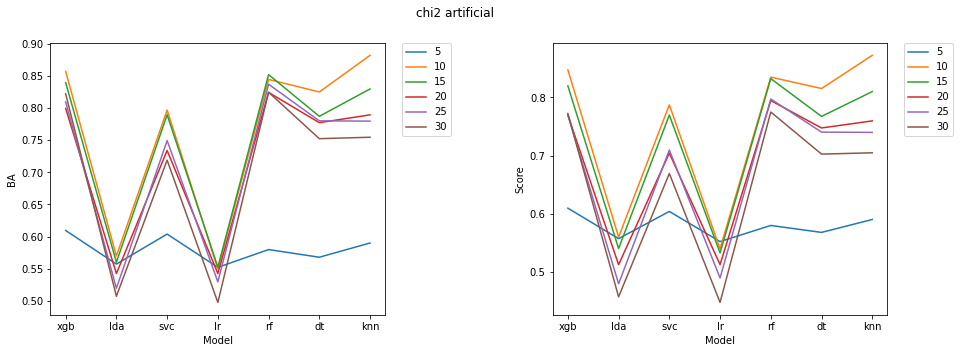

In [211]:
search_best_features([5, 10, 15, 20, 25, 30], 'chi2', art_train_X, art_train_y, art_val_X, art_val_y, 'artificial')

In [215]:
search_best_features([5, 10, 15, 20, 25, 30], 'rfe', art_train_X, art_train_y, art_val_X, art_val_y, 'artificial')

Fitting estimator with 500 features.
Fitting estimator with 490 features.
Fitting estimator with 480 features.
Fitting estimator with 470 features.
Fitting estimator with 460 features.
Fitting estimator with 450 features.
Fitting estimator with 440 features.
Fitting estimator with 430 features.
Fitting estimator with 420 features.
Fitting estimator with 410 features.
Fitting estimator with 400 features.
Fitting estimator with 390 features.
Fitting estimator with 380 features.
Fitting estimator with 370 features.
Fitting estimator with 360 features.
Fitting estimator with 350 features.
Fitting estimator with 340 features.
Fitting estimator with 330 features.
Fitting estimator with 320 features.
Fitting estimator with 310 features.
Fitting estimator with 300 features.
Fitting estimator with 290 features.
Fitting estimator with 280 features.
Fitting estimator with 270 features.
Fitting estimator with 260 features.
Fitting estimator with 250 features.
Fitting estimator with 240 features.
F

In [ ]:
search_best_features([5, 10, 15, 20, 25, 30], 'gini', art_train_X, art_train_y, art_val_X, art_val_y, 'artificial')

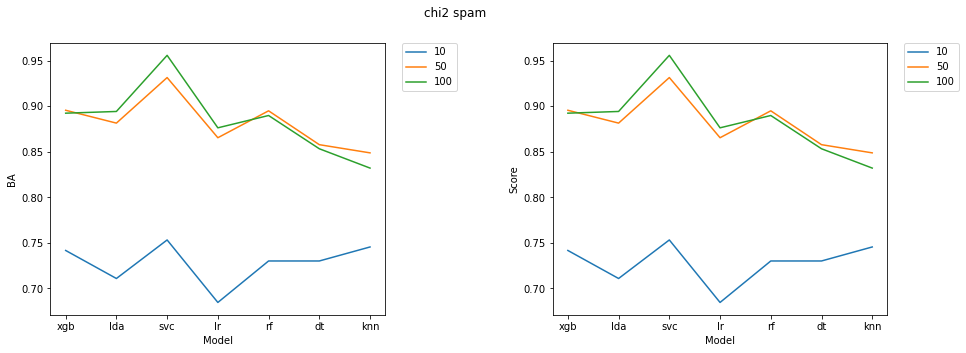

In [213]:
search_best_features([10, 50, 100], 'chi2', spam_train_X, spam_train_y, spam_val_X, spam_val_y, 'spam')

In [ ]:
search_best_features([10, 50, 100], 'rfe', spam_train_X, spam_train_y, spam_val_X, spam_val_y, 'spam')

In [ ]:
search_best_features([10, 50, 100], 'gini', spam_train_X, spam_train_y, spam_val_X, spam_val_y, 'spam')